# 선요약


### 가정 : 데이터가 많으면 유니콘 기업으로 볼 수 있을 것이다.
### 결론 : 데이터가 많다고 유니콘기업으로 분류할 수 없다.

`매출액`을 기준으로 간단한 시각화 처리를 진행했습니다.    
하지만 특정 기업을 선정하는 방식에 논리적 비약이 존재합니다.(ex. 유니콘기업으로 추정되는 기업을 긴 시간 추적했을 것이다.)   
보다 효과적인 분석방법을 고려할 필요가 있으며, 의견 제시 부탁드립니다.

## 팀프로젝트 Week1 ‒원티드 국민연금DB를 이용해서 유니콘 기업 발굴하기

원티드는 크레딧잡 서비스를 운영하고 있습니다.       
이 데이터는 국민연금가입 사업장 내역이라는 공개데이터를 기반으로 합니다.         
국민연금가입을 했다면 기록에 남을 수 밖에 없는 모든 기업 데이터를 통해 여러 인사이트를 도출할 수 있습니다.     

미리 진행된 데이터전처리를 통해 기업을 식별할 수는 있는 테이블을 제공해드립니다.      
이 데이터를 조인하면 회사의 국민연금고지금액, 매출액, 인원수를 월별로 볼 수 있습니다.         
이를 통해 2015년부터 2019년사이의 추이를 그려보시고 유니콘기업으로 보이는 기업들을 나름의 방식으로 찾아주세요.         

이 문제에 대한 정답은 없습니다.         
따라서 솔루션을 제공해드릴 수는 없는 점 양해바랍니다.        


데이터정보

- 회사수: 약5,000개
- 연도 : 2015 ~ 2019
- 월별데이터: 직원수, 국민연금보험료(인원 수에 대한 상한선_최대고지금액이 존재함)
- 년단위데이터: 매출액(천 원 단위)

  

EDA 목표

- 위 데이터들의 분포(직원수, 매출액, 보험료, +@)
- 몇몇 회사를 선택하여 데이터 흐름 살펴보기
- 데이터 사이의 관계에 대해 유의미한 결론을 찾아봅시다. (아이디어 수립==>EDA를 통해 관찰)

# ==============================================

### 방법론 소고

어떻게 유니콘 기업을 발견해낼 것인가?       

유니콘 기업에 대한 사전적 정의는 아래와 같다.      
**[유니콘 기업(Unicorn)은 기업 가치가 10억 달러(=1조 원) 이상이고 창업한 지 10년 이하인 비상장 스타트업 기업을 말한다.](https://ko.wikipedia.org/wiki/%EC%9C%A0%EB%8B%88%EC%BD%98_%EA%B8%B0%EC%97%85)**       


이때 창업한 지 10년 이하 라는 조건을 고려할 필요는 없다. (2015~2019이기 때문)   
그렇다면 활용해야 할 조건은 **기업가치가 1조 원 이상이라는 조건**이다.    
하지만 기업가치라는 영역은 단순 계산이 불가능한 부분이며, 여러 복합적 요소를 고려해야 한다.       
때문에 몇몇 요소를 고려해 기업가치가 높을 것으로 보이는 기업을 찾아보자.        




### 기본 접근 방향
1. 매출액 성장에 기반한 분석 ✔
   
   
   
2. ~직원수 성장에 기반한 분석~
    - ~사세 확장에 따른 직원 충원~
    
    
3. ~국민연금 납부액 성장에 기반한 분석~
    - ~국민연금의 일반적인 회사 부담은 4.5% 이다.~
    

# =================================================================

In [1]:
# 라이브러리 임포트
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys

import warnings
warnings.filterwarnings('ignore')

print("파이썬 버전 :",sys.version)
print("판다스 버전 :",pd.__version__)

파이썬 버전 : 3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]
판다스 버전 : 1.1.3


In [2]:
# 데이터 확인
path = "C:/Users/parkgun/Desktop/프리온보딩/팀프로젝트_1주차/data"
os.listdir(path)

['company_nps_data.csv']

In [3]:
# 데이터 불러오기
df = pd.read_csv(path+"/company_nps_data.csv", encoding="cp949")
display(df.head())

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151


In [4]:
# 전체 파일 길이 
print("데이터 길이 :", len(df))

데이터 길이 : 99801


In [5]:
# 결측치 확인
df.isna().sum()

회사ID        0
연매출액        0
년도          0
월           0
월별_연금보험료    0
월별_직원수      0
dtype: int64

In [6]:
# 컬럼별 유니크 값 출력 ==> 특이점 없음
for col in df.columns:
    print(f"column : {col}")
    print(f"The number of unique : {df[col].nunique()}")
    print()

column : 회사ID
The number of unique : 5000

column : 연매출액
The number of unique : 10108

column : 년도
The number of unique : 5

column : 월
The number of unique : 12

column : 월별_연금보험료
The number of unique : 50747

column : 월별_직원수
The number of unique : 1187



In [7]:
# 회사 ID별 중복 행 갯수 확인
check_df = df.groupby(['회사ID']).size()

In [8]:
new_df = pd.DataFrame(check_df)
new_df.columns = ['num']

# 회사 ID 별 행 갯수 출력
display(new_df)

,num
회사ID,
63,12
95,12
102,8
295,8
414,12
...,...
2400284,7
2437574,1
2693684,6


# 의문점

- 왜 어떤 것은 데이터가 하나이고, 어떤 것은 여러 개인가? 
    - 모두 유니콘 기업인데 유니콘 기업으로 특정되었던 때를 추출한건가?
    - 분명 전처리 된 데이터라고 했음
    - 1개밖에 남지 않았던 이유와 12개 전부가 남은 이유를 찾아야 할 필요가 있음


- 여러 개인 데이터는 특정 연도의 12개월인지 확인할 필요가 있음 ==> 해가 넘어가는지 안넘어가는지 
    - 12개를 넘어가는 데이터가 있는지도 확인해야 함

In [9]:
# 한 해는 12개월이니까 최소 1년을 넘는 기업들 위주로 찾아보자.
df_12 = new_df[new_df['num'] > 12]

In [10]:
# 1년 넘게 측정된 기업 ==> 예전부터 지속적으로 관찰되었을 것이다.
display(df_12.sort_values(by='num', ascending=False).head(20)) # 총 14개가 50개 ==> 데이터가 50개인 아이디를 추려봅시다.

,num
회사ID,
14271,50
395238,50
404192,50
296819,50
134575,50
138077,50
135668,50
237625,50
128174,50


In [11]:
df_50 = df_12[df_12['num']==50]

In [12]:
# 행 개수가 50개인 회사ID 나열
display(df_50.index)

Int64Index([ 14271, 128174, 130756, 134575, 135668, 138077, 155754, 237625,
            250472, 296819, 395238, 404192, 442467, 442525],
           dtype='int64', name='회사ID')

In [13]:
# 우선 행 데이터가 50개인 회사ID 리스트
list_50 = [14271, 128174, 130756, 134575, 135668, 138077, 155754, 237625, 250472, 296819, 395238, 404192, 442467, 442525]

In [14]:
# 일단 예시로 하나만 뽑아보자
df_ID_14271 = df[df['회사ID']==14271]

# 연도와 월을 묶어서 컬럼 형성
df_ID_14271['년월'] = pd.to_datetime(df['년도'].astype(str) + df['월'].astype(str), format='%Y%m').dt.strftime('%Y%m')

# 회사ID, 연도와 월을 제거해보자
df_ID_14271.drop(df_ID_14271[['회사ID','년도','월']], axis=1, inplace=True)

# 시간순으로 나열해보자
df_ID_14271= df_ID_14271.sort_values(by='년월')

# 확인
display(df_ID_14271)

,연매출액,월별_연금보험료,월별_직원수,년월
19588,1199495,2571840,11,201511
44251,1199495,3558780,15,201512
39783,4257715,3358340,15,201601
27519,4257715,3142340,14,201602
4503,4257715,3016340,13,201603
76714,4257715,3016340,13,201604
26844,4257715,2899340,12,201605
51843,4257715,3183300,13,201606
36296,4257715,3994700,14,201607
71375,4257715,4166140,16,201608


# 생각해볼 것
- 일정한 시간 순서로 데이터가 존재한다.
- 월별 연금보험료와 직원수는 비례한다. 
- 월별 직원수에 따라 연금보험료는 줄어드는 부분이 존재한다. (중간 변화를 어떻게 처리해야 하는가?)
- 월별 직원수와 연금보험료는 묶어서 처리해야 한다.
- 연매출은 계속해서 늘어난다. (일관적인 상승을 기대)

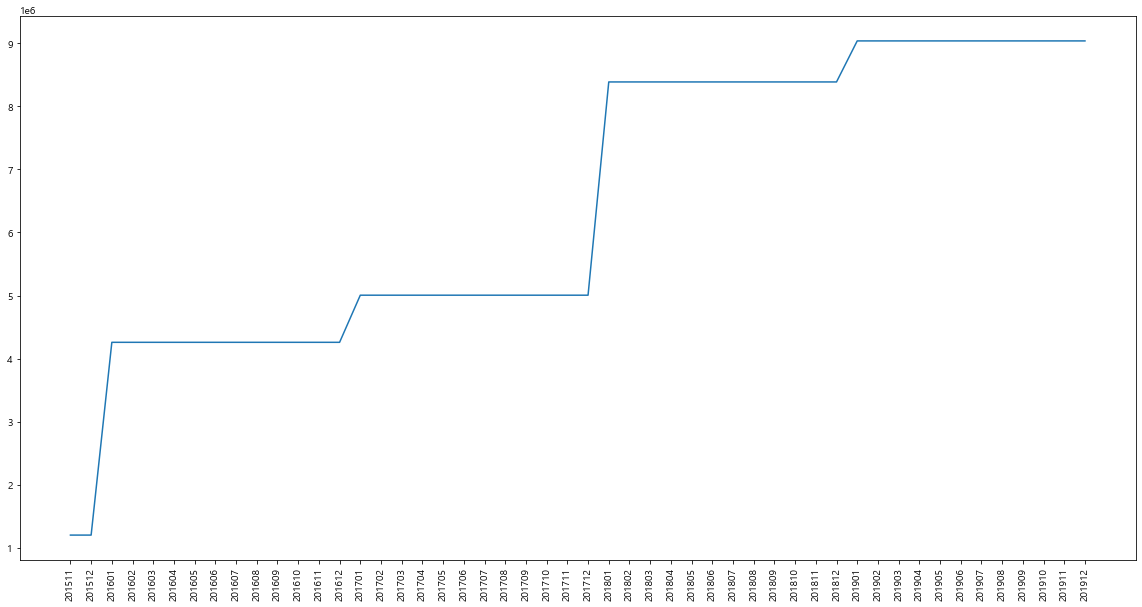

In [15]:
# df_ID_14271 시각화

%matplotlib inline
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
plt.plot(df_ID_14271['년월'],df_ID_14271['연매출액'])



## 확인해볼 것
- 과연 기록이 많으면 좋은 기업인가?
- 함수로 위의 과정을 간략화한 뒤, 14개의 데이터를 모두 그려보자.

In [16]:
# 함수 구조가 좀 이상함 ==> 다시 생각해볼 것

def check_sales(df, x):

    pre_name = 'df_ID_'
    new_name = pre_name + str(x)
    
    print()
    print(x, "회사 그래프입니다.")    
    
    # 특정 기업 선택
    new_name = df[df['회사ID']==x]

    # 연도와 월을 묶어서 컬럼 형성
    new_name['년월'] = pd.to_datetime(df['년도'].astype(str) + df['월'].astype(str), format='%Y%m').dt.strftime('%Y%m')

    # 회사ID, 연도와 월을 제거해보자
    new_name.drop(new_name[['회사ID','년도','월']], axis=1, inplace=True)

    # 시간순으로 나열
    new_name= new_name.sort_values(by='년월')

    plt.figure(figsize=(20,10))
    plt.xticks(rotation='vertical')
    plt.title(x)
    plt.plot(new_name['년월'],new_name['연매출액'])
    plt.show()



14271 회사 그래프입니다.


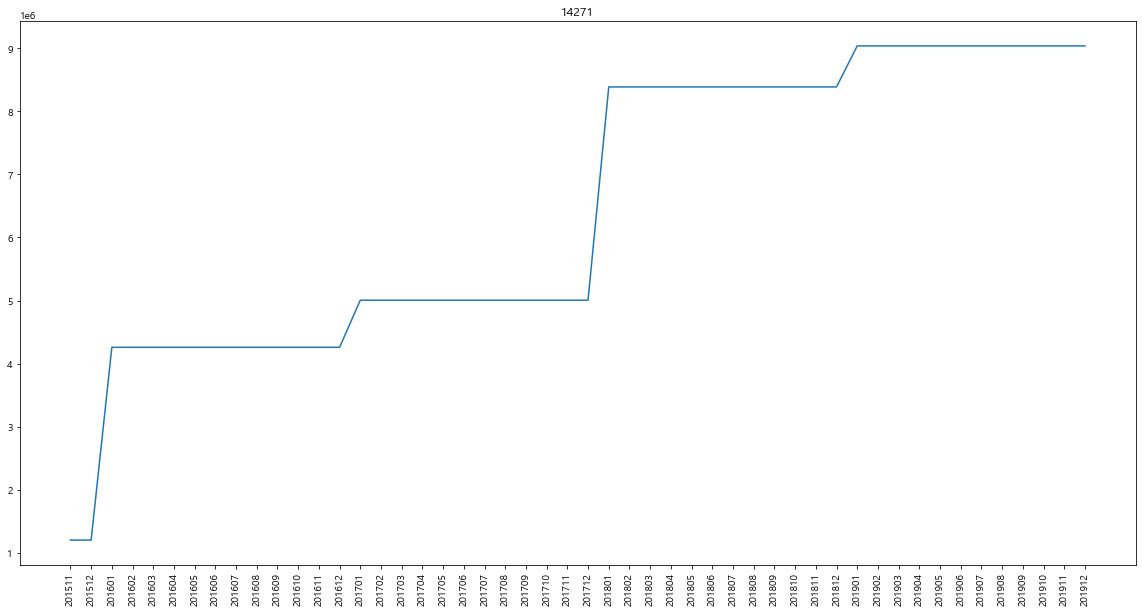


128174 회사 그래프입니다.


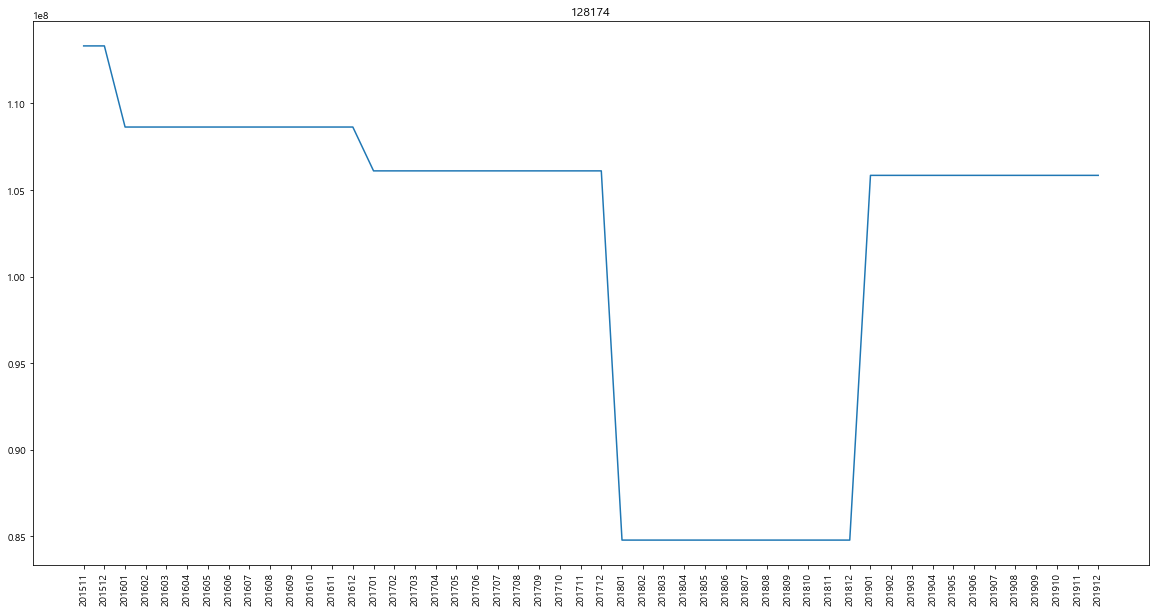


130756 회사 그래프입니다.


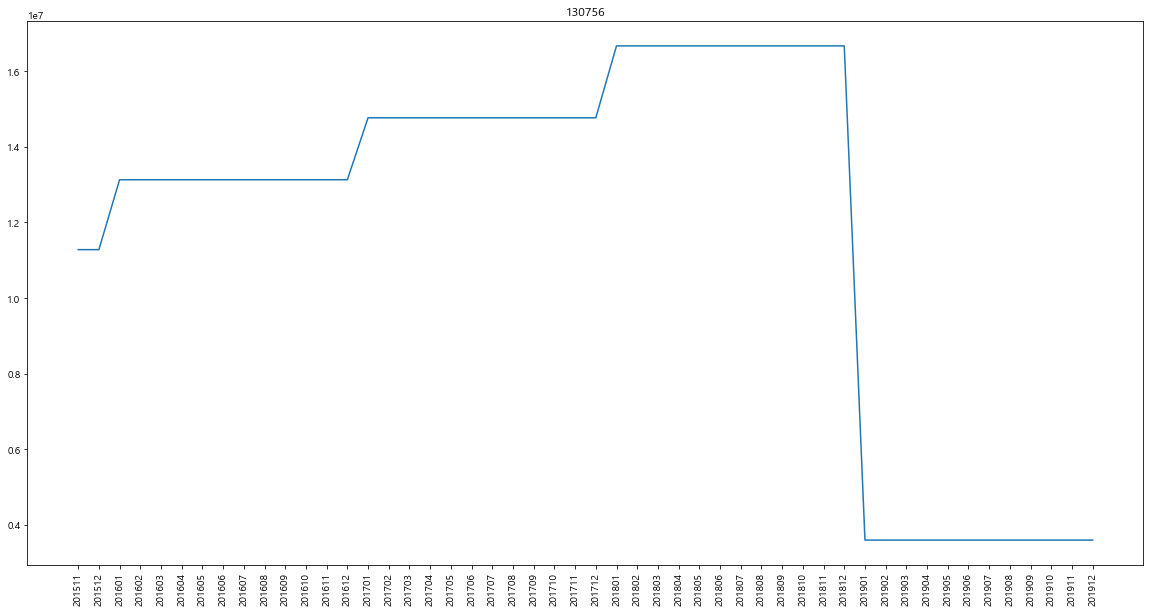


134575 회사 그래프입니다.


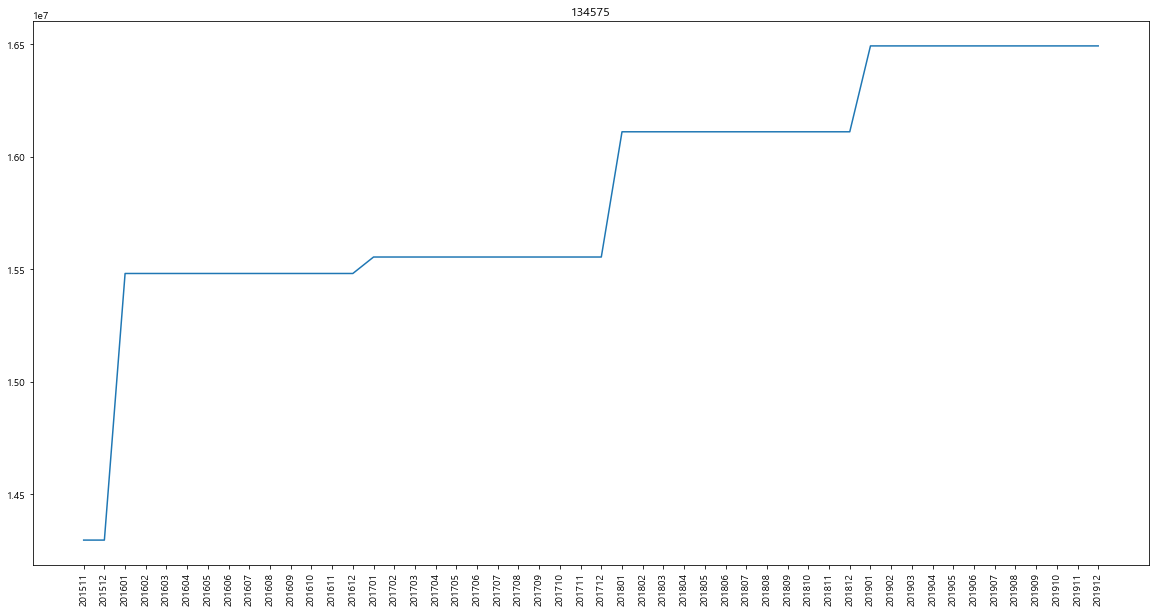


135668 회사 그래프입니다.


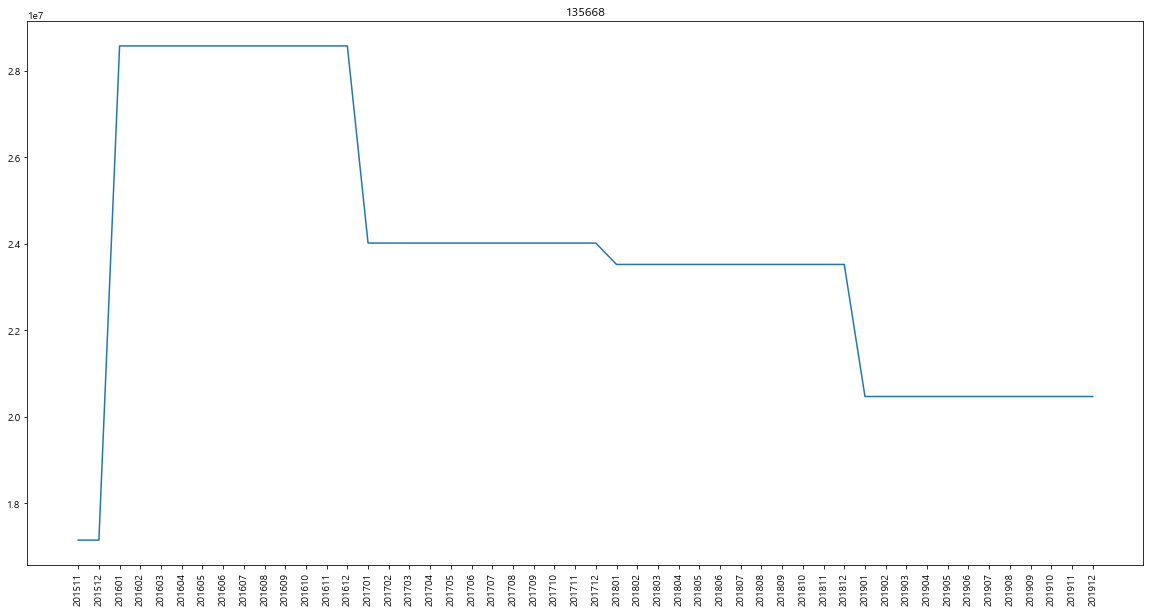


138077 회사 그래프입니다.


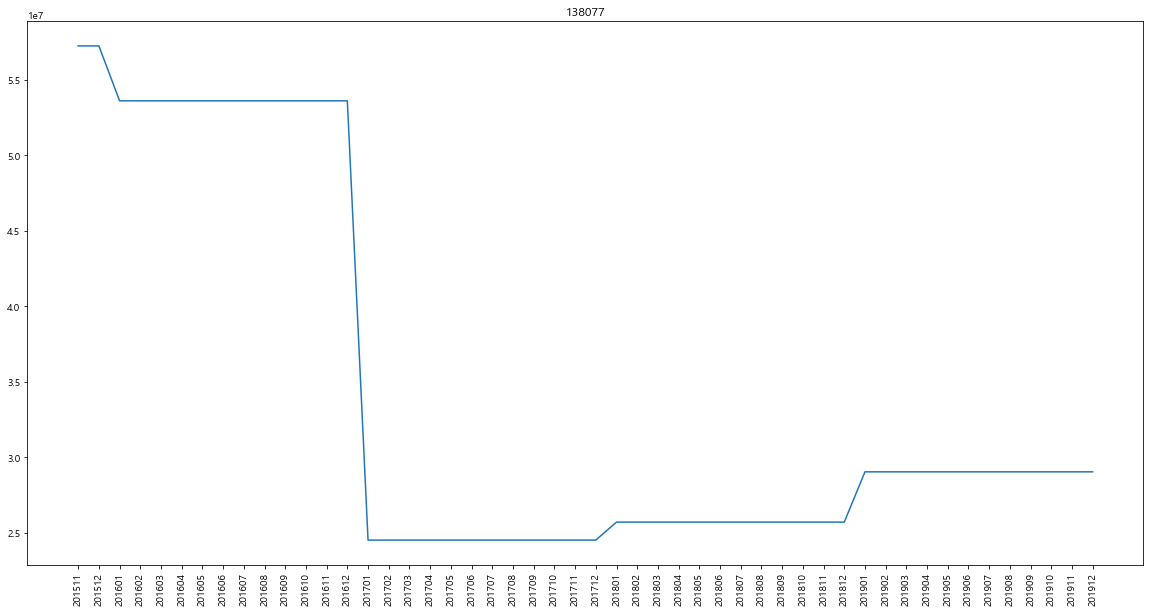


155754 회사 그래프입니다.


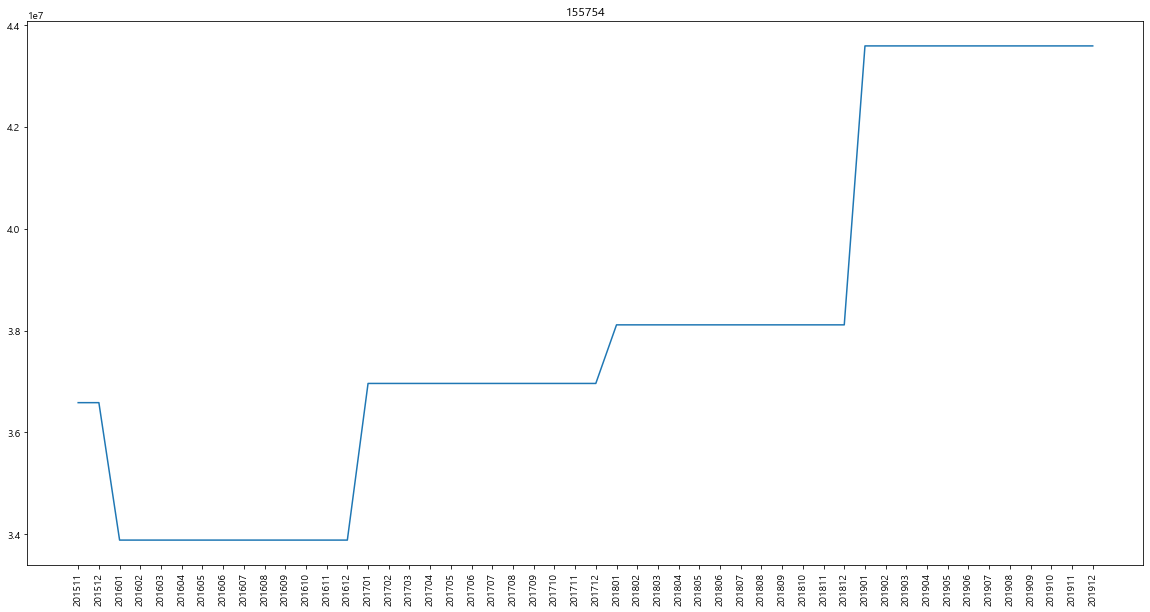


237625 회사 그래프입니다.


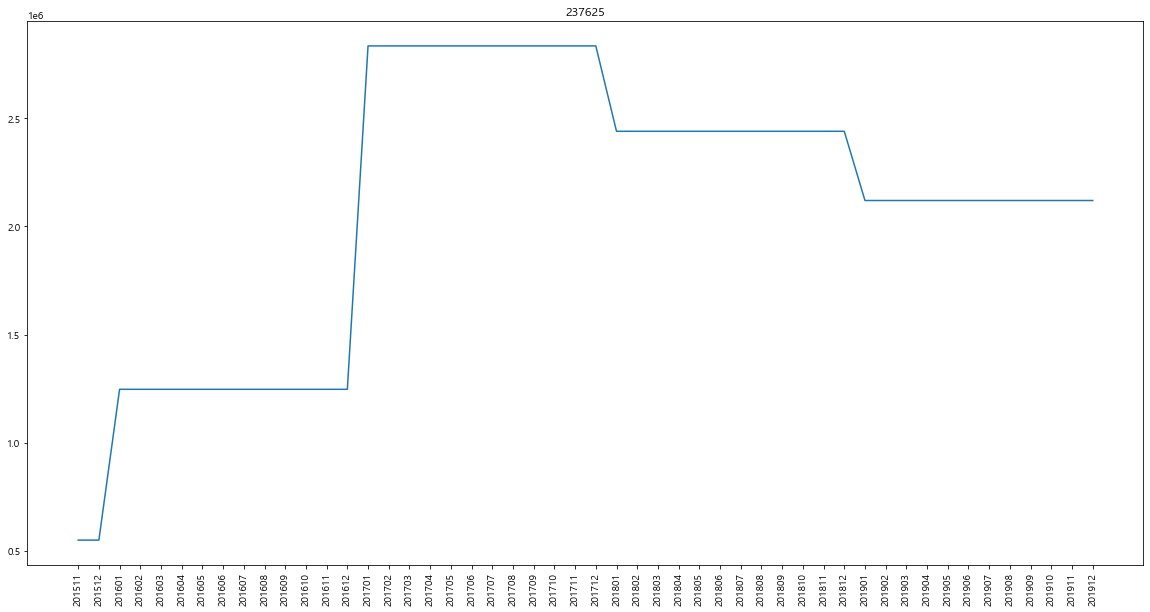


250472 회사 그래프입니다.


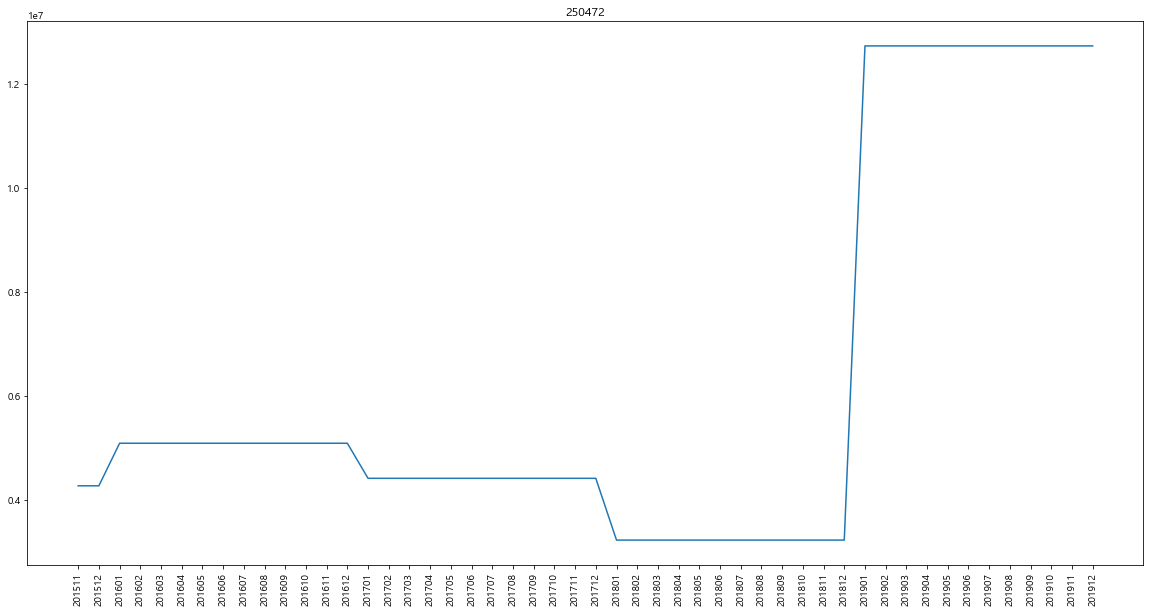


296819 회사 그래프입니다.


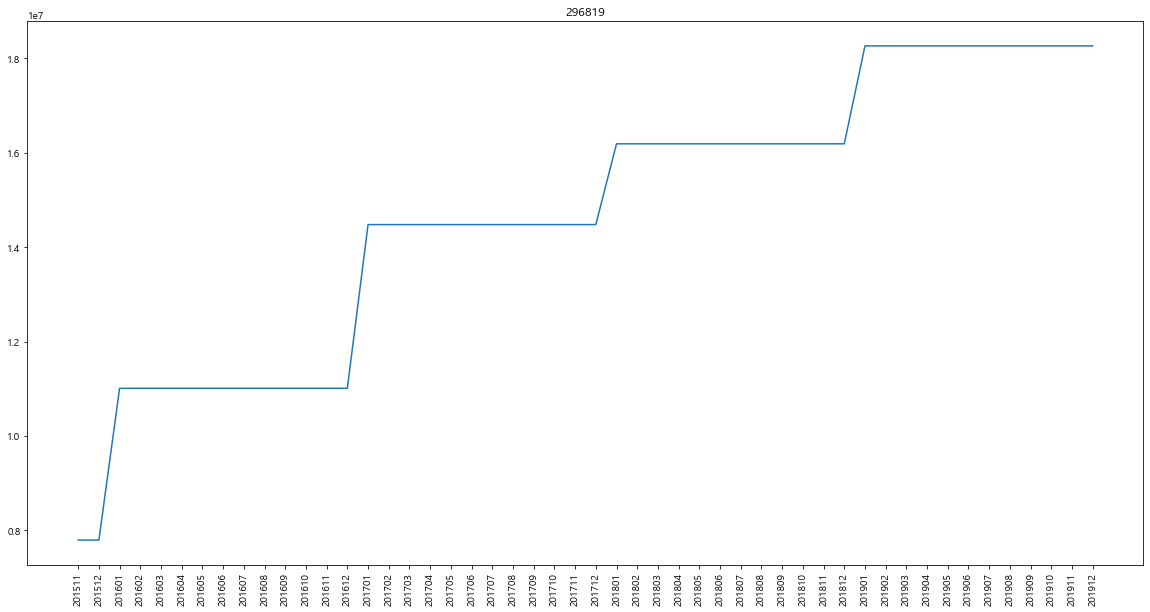


395238 회사 그래프입니다.


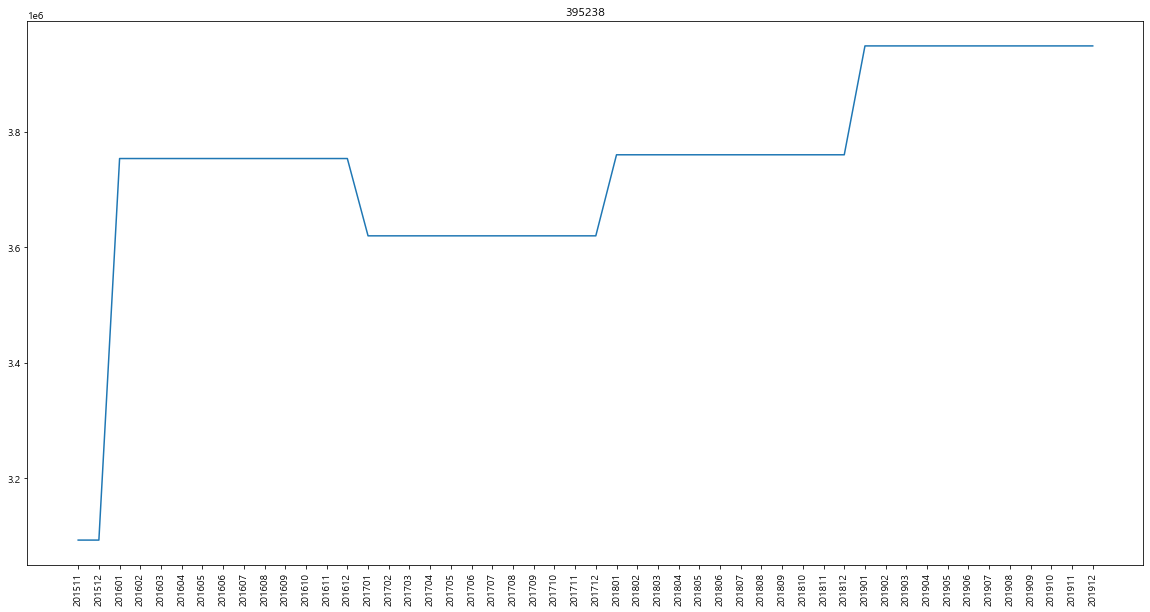


404192 회사 그래프입니다.


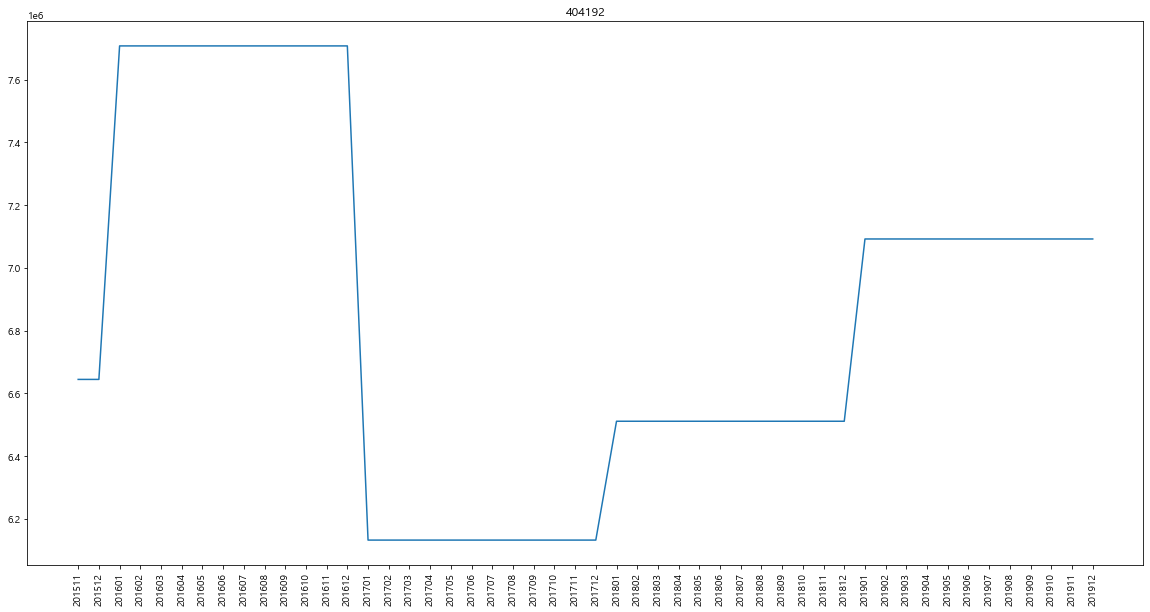


442467 회사 그래프입니다.


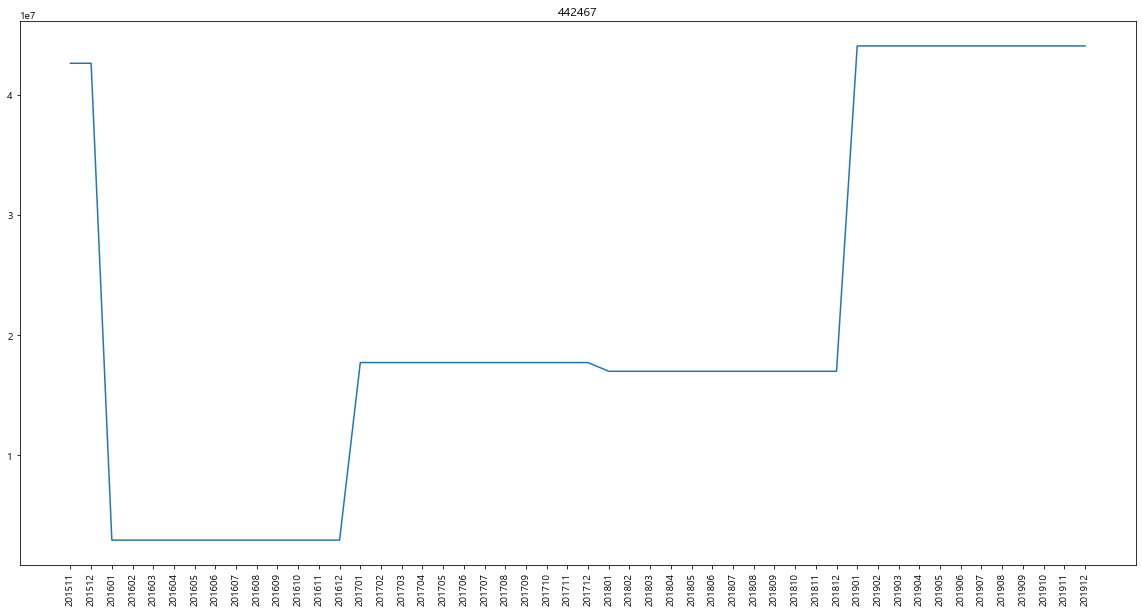


442525 회사 그래프입니다.


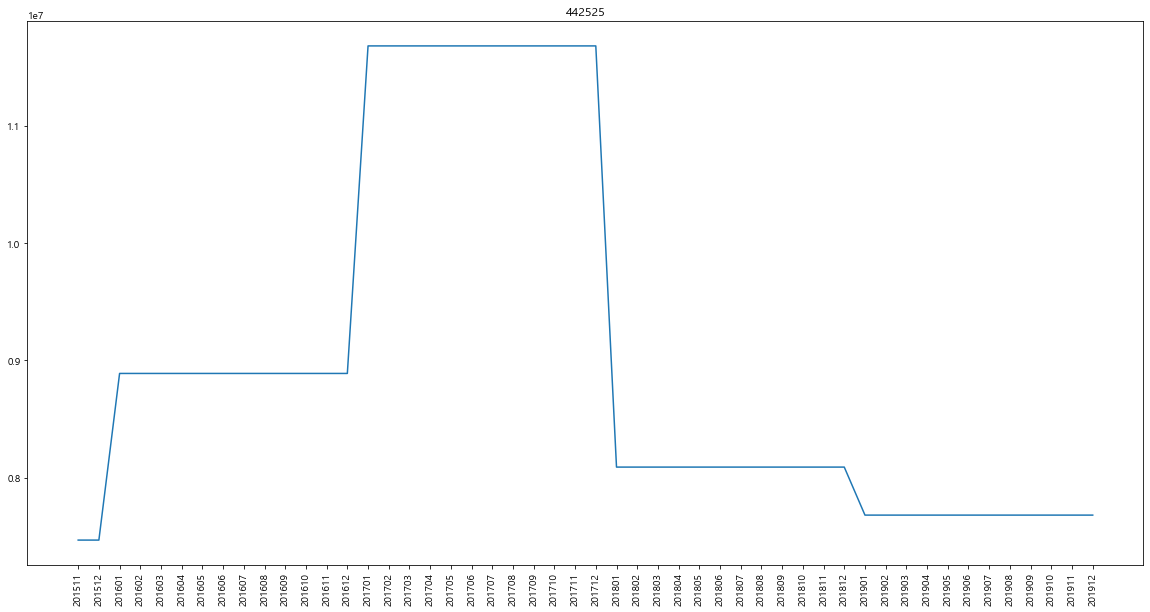

In [17]:
for i in list_50 :
    check_sales(df,i)

# 시각화 결과에 대한 생각
- 무조건적으로 데이터가 많다고 좋은 기업은 아니다.

# 생각해볼 것
- 일시적으로 하락한 뒤 다시 성장하는 기업을 어떻게 분류해야 하는가?